In [1]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 49.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [3]:
data = pd.read_csv('dataset_Facebook.csv')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
data['Type'].value_counts()

Type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

In [5]:
# Imputación de valores faltantes usando la mediana
data['Paid'].fillna(data['Paid'].median(), inplace=True)
data['like'].fillna(data['like'].median(), inplace=True)
data['share'].fillna(data['share'].median(), inplace=True)

# Generación de resumen descriptivo completo
descriptive_summary = data.describe(include='all')
descriptive_summary


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,123194.176000,NaN,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.792000,27.200000,212.120000
std,16272.813214,NaN,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.092858,42.448554,380.233118
min,81370.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,NaN,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.750000,10.000000,71.000000
50%,129600.000000,NaN,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,NaN,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000


In [6]:
# Crear una base de datos con las variables seleccionadas y renombrar las columnas en español
data_selected = data[['Total Interactions', 'Lifetime Post Total Reach', 'Lifetime Engaged Users', 'Lifetime Post Consumers']]

# Renombrar las columnas
data_selected.columns = ['Interacciones_Totales', 'Alcance_Total', 'Usuarios_Comprometidos', 'Consumidores_Post']

# Mostrar la base de datos resultante
data_selected


,Interacciones_Totales,Alcance_Total,Usuarios_Comprometidos,Consumidores_Post
0,100,2752,178,109
1,164,10460,1457,1361
2,80,2413,177,113
3,1777,50128,2211,790
4,393,7244,671,410
...,...,...,...,...
495,84,4684,733,708
496,75,3480,537,508
497,115,3778,625,572
498,136,4156,626,574


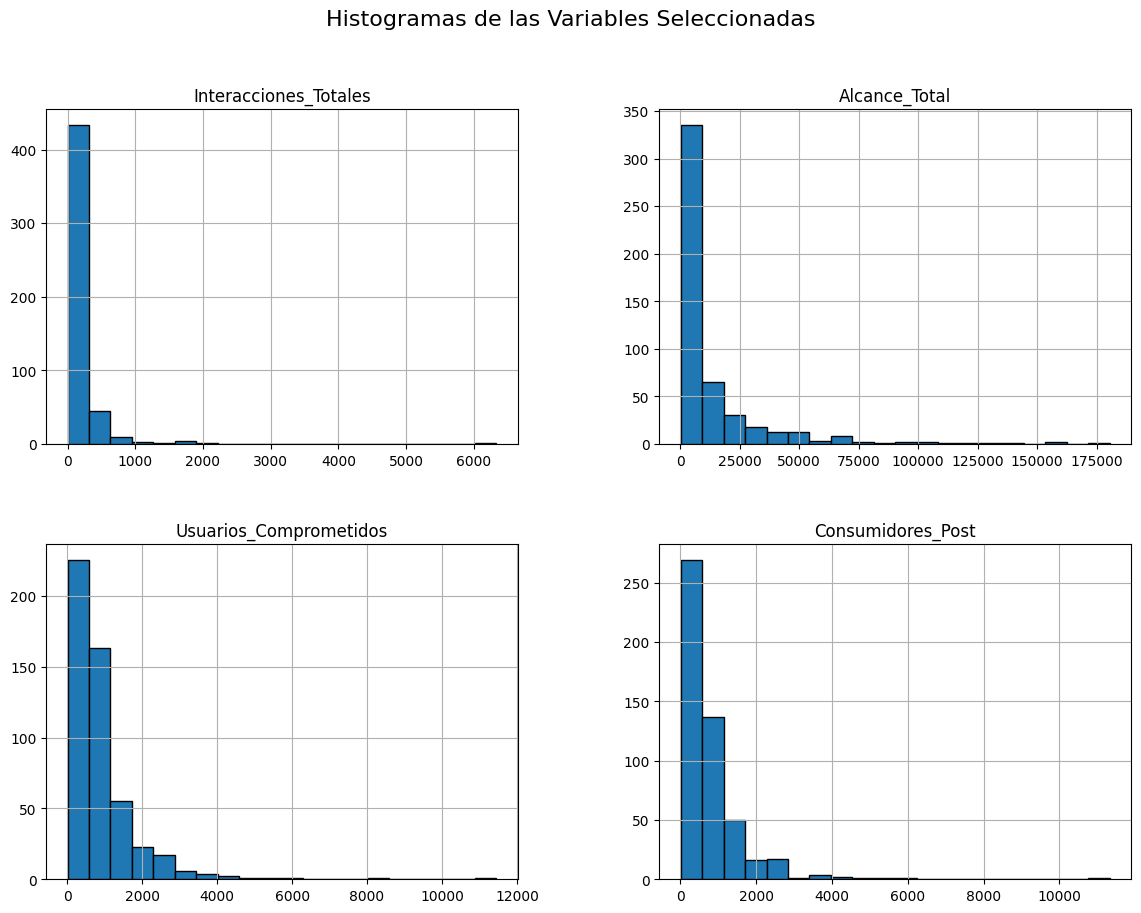

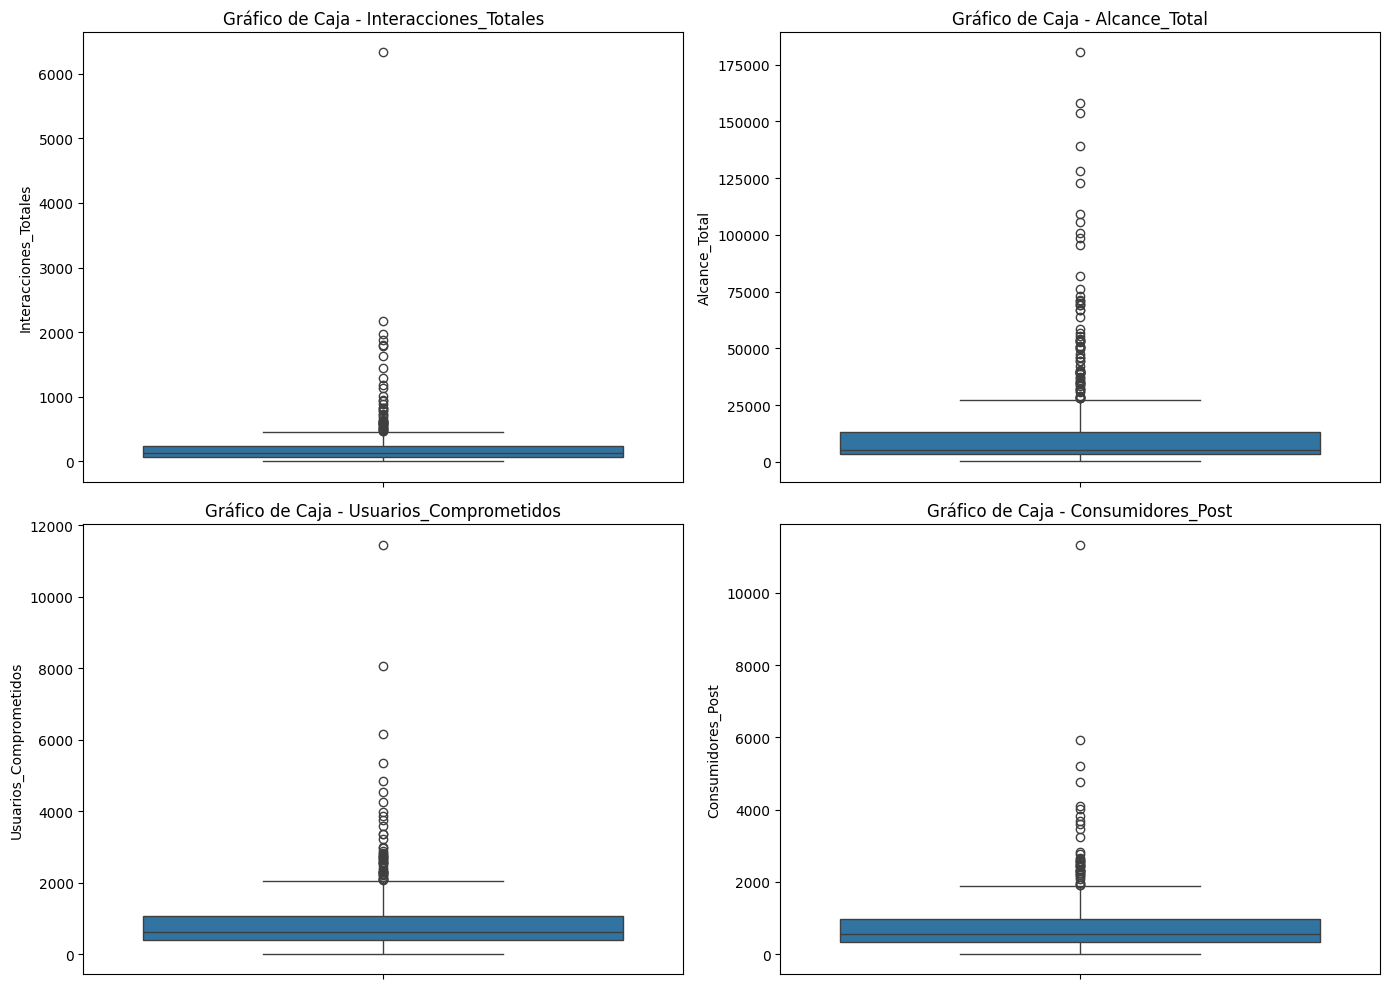

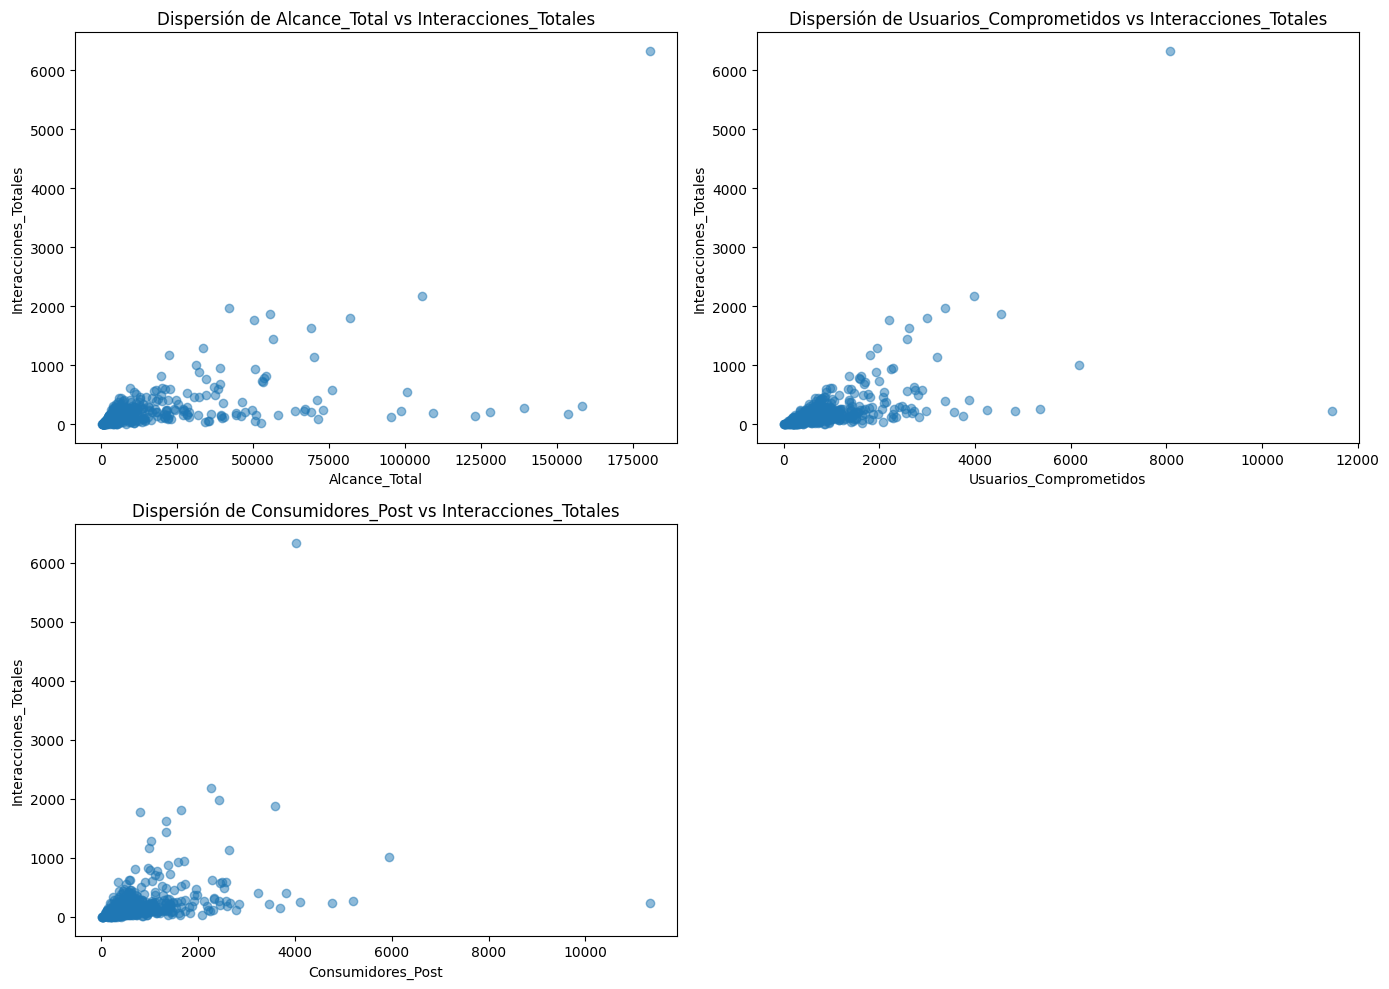

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas para cada variable
data_selected.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Histogramas de las Variables Seleccionadas', fontsize=16)
plt.show()

# Crear gráficos de caja (boxplots) para cada variable
plt.figure(figsize=(14, 10))
for i, column in enumerate(data_selected.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data_selected[column])
    plt.title(f'Gráfico de Caja - {column}')
plt.tight_layout()
plt.show()

# Crear gráficos de dispersión de las variables independientes contra la dependiente
plt.figure(figsize=(14, 10))
for i, column in enumerate(data_selected.columns[1:], 1):
    plt.subplot(2, 2, i)
    plt.scatter(data_selected[column], data_selected['Interacciones_Totales'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Interacciones_Totales')
    plt.title(f'Dispersión de {column} vs Interacciones_Totales')
plt.tight_layout()
plt.show()


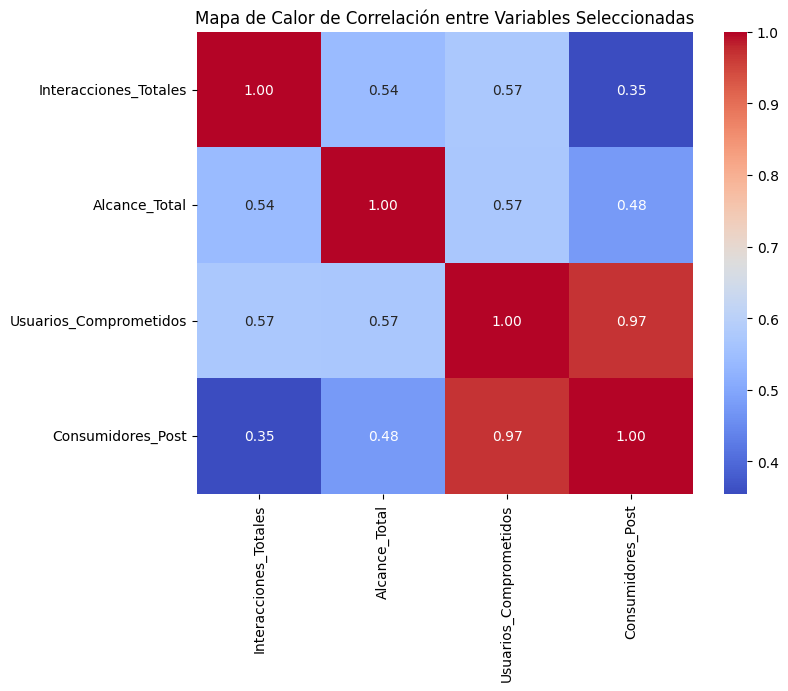

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generar un mapa de calor de las correlaciones entre las variables seleccionadas
plt.figure(figsize=(8, 6))
correlation_matrix = data_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables Seleccionadas')
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir los datos en variables independientes (X) y dependientes (y)
X = data_selected[['Usuarios_Comprometidos']]
y = data_selected['Interacciones_Totales']



In [25]:
# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [26]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)


Error Absoluto Medio (MAE): 112.19851812703254
Error Cuadrático Medio (MSE): 41127.133310229096
Raíz del Error Cuadrático Medio (RMSE): 202.7982576607331
Coeficiente de Determinación (R²): 0.2408261392585146


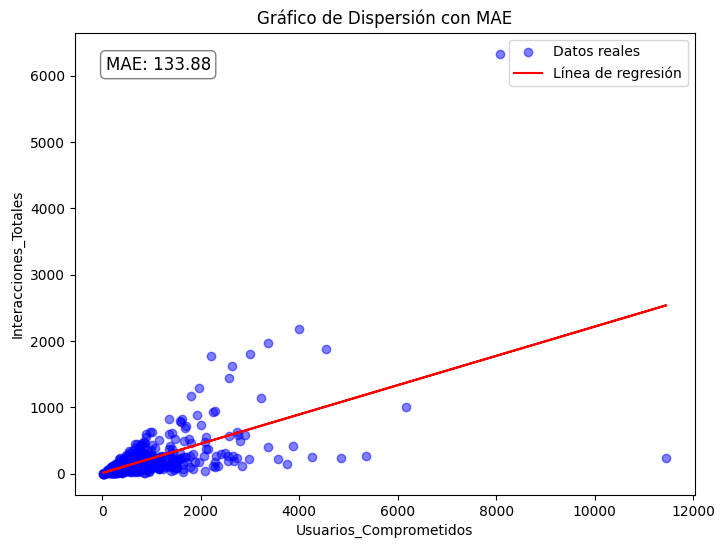

In [12]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Dividir los datos en variables independientes (X) y dependientes (y)
X = data_selected[['Usuarios_Comprometidos']]
y = data_selected['Interacciones_Totales']

# Definir una función para graficar el modelo y mostrar el MAE
def plot_regression_with_mae(X, y, mae_value):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales')
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Graficar la línea de regresión
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    
    # Añadir la métrica MAE en el gráfico
    plt.text(0.05, 0.95, f'MAE: {mae_value:.2f}', transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))
    
    # Etiquetas y leyenda
    plt.xlabel('Usuarios_Comprometidos')
    plt.ylabel('Interacciones_Totales')
    plt.title('Gráfico de Dispersión con MAE')
    plt.legend()
    plt.show()

# Calcular el modelo y error
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)

# Llamar a la función para graficar
plot_regression_with_mae(X, y, mae)


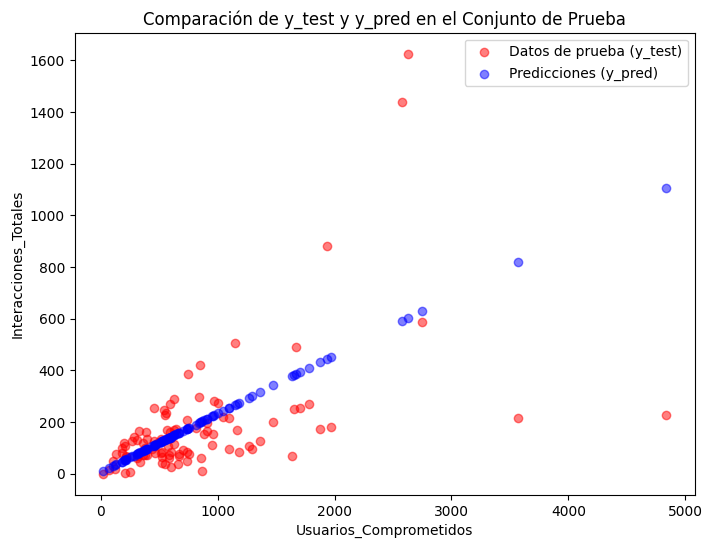

In [27]:
# Crear el gráfico de dispersión para comparar y_test y y_pred
plt.figure(figsize=(, 6))

# Graficar y_test en rojo
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Datos de prueba (y_test)')

# Graficar y_pred en azul
plt.scatter(X_test, y_pred, color='blue', alpha=0.5, label='Predicciones (y_pred)')

# Etiquetas y leyenda
plt.xlabel('Usuarios_Comprometidos')
plt.ylabel('Interacciones_Totales')
plt.title('Comparación de y_test y y_pred en el Conjunto de Prueba')
plt.legend()
plt.show()

In [28]:
y_test.head()

361    105
73     233
374     75
155     70
104     72
Name: Interacciones_Totales, dtype: int64

In [29]:
y_pred

array([ 111.11710025,  132.03054944,  158.39968103,   79.06496616,
         87.02116966,  142.48727404,  196.36213771,   62.92523907,
         53.83243507,  432.32040141,   69.51752197,  384.58318043,
        118.16402335,   51.10459388,  630.99816872,  124.98362634,
        172.49352722,   93.38613246,  177.72188952,   82.70208776,
        222.049309  ,  223.1859095 ,  172.94816742,  133.62179014,
          9.73233569,  299.33814297,  147.94295643,  149.07955693,
        602.35583613,  377.76357743,  273.87829178,  125.43826654,
        129.98466854,  129.75734844,   46.10355168,  141.35067354,
        147.71563633,  139.53211274,   91.34025156,  128.84806804,
        157.94504083,   76.33712496,   20.87102059,   90.88561136,
         66.78968077,  105.43409775,   46.33087178,   53.15047477,
        381.62801913,   32.69166578,  234.55191449,  139.53211274,
        203.18174071,  151.80739813,  122.25578514,  110.20781985,
        453.0065305 ,   35.41950698,   95.43201336,   55.19635

In [30]:
105-111.11710025

-6.117100249999993

In [32]:
Q1 = data_selected.quantile(0.25)
Q3 = data_selected.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos sin outliers
data_selected2 = data_selected[~((data_selected < (Q1 - 1.5 * IQR)) | (data_selected > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar el DataFrame resultante
data_selected2

,Interacciones_Totales,Alcance_Total,Usuarios_Comprometidos,Consumidores_Post
0,100,2752,178,109
1,164,10460,1457,1361
2,80,2413,177,113
4,393,7244,671,410
5,186,10472,1191,1073
...,...,...,...,...
495,84,4684,733,708
496,75,3480,537,508
497,115,3778,625,572
498,136,4156,626,574


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir los datos en variables independientes (X) y dependientes (y)
X = data_selected2[['Usuarios_Comprometidos']]
y = data_selected2['Interacciones_Totales']

In [35]:
# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)

Error Absoluto Medio (MAE): 67.37392652022217
Error Cuadrático Medio (MSE): 7436.1298142269925
Raíz del Error Cuadrático Medio (RMSE): 86.23299724715008
Coeficiente de Determinación (R²): 0.13646423071952674


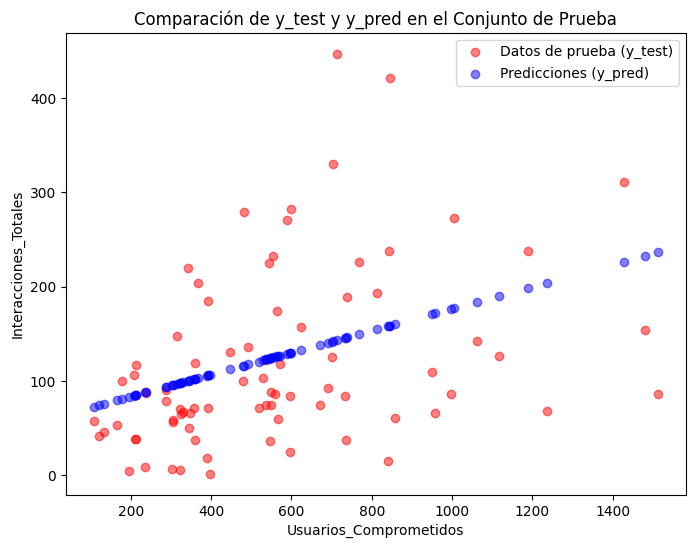

In [39]:
# Crear el gráfico de dispersión para comparar y_test y y_pred
plt.figure(figsize=(8, 6))

# Graficar y_test en rojo
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Datos de prueba (y_test)')

# Graficar y_pred en azul
plt.scatter(X_test, y_pred, color='blue', alpha=0.5, label='Predicciones (y_pred)')

# Etiquetas y leyenda
plt.xlabel('Usuarios_Comprometidos')
plt.ylabel('Interacciones_Totales')
plt.title('Comparación de y_test y y_pred en el Conjunto de Prueba')
plt.legend()
plt.show()

# Modelo de regresión multiple

In [40]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Seleccionar las columnas necesarias con nombres más cortos en español
df_selected = data[['Lifetime Engaged Users', 'Lifetime Post Total Reach', 'Total Interactions']]
df_selected.columns = ['Usuarios_Comprometidos', 'Alcance_Total', 'Interacciones_Totales']

In [42]:
# Dividir los datos en variables independientes (X) y dependientes (y)
X = df_selected[['Usuarios_Comprometidos', 'Alcance_Total']]
y = df_selected['Interacciones_Totales']

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)


In [44]:
X_train.head()

,Usuarios_Comprometidos,Alcance_Total
249,479,2602
433,1411,11420
19,121,1591
322,560,3662
332,566,2718


In [58]:
y_test

361    105
73     233
374     75
155     70
104     72
      ... 
347     72
86     163
75     505
438     49
15     108
Name: Interacciones_Totales, Length: 100, dtype: int64

In [46]:
y_pred

array([  86.38371865,  144.11905833,  137.68020781,   55.67163271,
         66.24759196,  112.67154586,  166.88463936,   39.24967587,
         41.0264806 ,  397.85920121,   65.2692448 ,  440.16392168,
         98.89914021,   63.39672483,  519.5319862 ,  130.92870667,
        135.54243595,   82.88786943,  131.34605737,  232.28219022,
        172.578744  ,  178.19733319,  127.96803164,  106.41337404,
          5.87342713,  228.57657633,  113.92272305,  137.20733988,
        773.07119053,  305.02003378,  210.51401535,   93.16457167,
        103.47947337,  105.28473792,   37.06045674,  105.38170118,
        121.93091665,  298.69100832,   66.98500844,  226.42971241,
        136.23411772,   56.70122984,   34.58547286,   66.67451503,
         54.34293724,  187.77022092,   39.03158682,   45.61735968,
        519.13732701,   33.47710943,  201.34378951,  110.76047047,
        152.33331546,  126.10735706,   97.21547321,  155.84833089,
        359.57779306,   37.88980583,   75.81096735,   38.08514

In [47]:

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados de la evaluación
print("Error Absoluto Medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)


Error Absoluto Medio (MAE): 107.58194614817124
Raíz del Error Cuadrático Medio (RMSE): 186.5086174716188
Coeficiente de Determinación (R²): 0.35788825590318296


In [48]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Seleccionar las columnas necesarias y renombrarlas en español
df_selected = data[['Lifetime Engaged Users', 'Lifetime Post Total Reach', 'Lifetime Post Consumers', 'Total Interactions']]
df_selected.columns = ['Usuarios_Comprometidos', 'Alcance_Total', 'Consumidores_Post', 'Interacciones_Totales']

In [49]:
# Dividir los datos en variables independientes (X) y dependientes (y)
X = df_selected[['Usuarios_Comprometidos', 'Alcance_Total', 'Consumidores_Post']]
y = df_selected['Interacciones_Totales']

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [51]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados de la evaluación
print("Error Absoluto Medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R²):", r2)

Error Absoluto Medio (MAE): 33.68904179493824
Raíz del Error Cuadrático Medio (RMSE): 65.05107756907393
Coeficiente de Determinación (R²): 0.9218872733916856


In [52]:
X_test

,Usuarios_Comprometidos,Alcance_Total,Consumidores_Post
361,463,3332,406
73,555,11444,418
374,671,6880,639
155,322,1685,295
104,357,2645,315
...,...,...,...
347,392,3144,356
86,330,21176,228
75,1150,37376,808
438,103,5730,71


In [57]:
y_test

361    105
73     233
374     75
155     70
104     72
      ... 
347     72
86     163
75     505
438     49
15     108
Name: Interacciones_Totales, Length: 100, dtype: int64

In [56]:
y_pred

array([ 109.15415599,  220.86992532,   80.25527534,   61.33728004,
         83.52717425,  117.56027227,  219.72247171,   27.58731083,
         78.69161691,  186.96734495,  156.71123444,  532.30386717,
         83.82355331,  142.9366627 ,  380.98232807,   64.12592556,
         74.81932859,  135.66998003,   86.95615766,   21.0812989 ,
        105.60356555,  126.47467456,   61.82478565,  147.12968314,
          9.41503925,  102.07488529,  110.47081403,  362.18122216,
       1922.4327278 ,  128.64648462,  109.89572404,   98.21929452,
         59.6517959 ,  203.0669244 ,  106.84437903,   85.54645306,
        116.35413223,  187.82187477,  101.79051547,  306.14822636,
         73.21349889,  155.72764476,   18.53312652,   80.35131592,
        137.55940632,  102.66994897,  113.74179227,  131.90241983,
        292.21709782,   32.19264803,  274.52308923,  250.73743917,
         53.09186859,  114.12411734,  136.52844688,   85.96935994,
        218.64814837,   75.063493  ,  125.92548797,   89.48998

# Modelo basado en árboles de decisión

In [59]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Seleccionar las columnas necesarias y renombrarlas en español
df_selected = data[['Lifetime Engaged Users', 'Lifetime Post Total Reach', 'Lifetime Post Consumers', 'Total Interactions']]
df_selected.columns = ['Usuarios_Comprometidos', 'Alcance_Total', 'Consumidores_Post', 'Interacciones_Totales']

# Definir las variables dependiente e independientes para cada modelo
variables_modelos = [
    ['Usuarios_Comprometidos'],                                # Modelo 1: 1 variable independiente
    ['Usuarios_Comprometidos', 'Alcance_Total'],               # Modelo 2: 2 variables independientes
    ['Usuarios_Comprometidos', 'Alcance_Total', 'Consumidores_Post']  # Modelo 3: 3 variables independientes
]

# Entrenar y evaluar cada modelo
for i, variables in enumerate(variables_modelos, start=1):
    X = df_selected[variables]
    y = df_selected['Interacciones_Totales']
    
    # Separar el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo de árbol de decisión
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Mostrar los resultados de la evaluación
    print(f"Modelo {i} - Variables: {variables}")
    print("Error Absoluto Medio (MAE):", mae)
    print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
    print("Coeficiente de Determinación (R²):", r2)
    print("-" * 50)


Modelo 1 - Variables: ['Usuarios_Comprometidos']
Error Absoluto Medio (MAE): 155.3216666666667
Raíz del Error Cuadrático Medio (RMSE): 299.1941273376423
Coeficiente de Determinación (R²): -0.6524142713460241
--------------------------------------------------
Modelo 2 - Variables: ['Usuarios_Comprometidos', 'Alcance_Total']
Error Absoluto Medio (MAE): 101.59
Raíz del Error Cuadrático Medio (RMSE): 198.83422743582153
Coeficiente de Determinación (R²): 0.27021471891300974
--------------------------------------------------
Modelo 3 - Variables: ['Usuarios_Comprometidos', 'Alcance_Total', 'Consumidores_Post']
Error Absoluto Medio (MAE): 81.02
Raíz del Error Cuadrático Medio (RMSE): 142.7630904680898
Coeficiente de Determinación (R²): 0.6237775657443643
--------------------------------------------------


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5443863f-322e-45ce-b24d-3c24b0d51984' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>